In [2]:
#SOURCES==https://scikit-learn.org/stable/index.html,
#A1-Merge your train & test sets and remove the class labels. Use k-means algorithm with k = 3 or 5
#(based on your dataset) to form the clusters.
import numpy as np
from sklearn.cluster import KMeans

# Load the datasets
features = np.load('/content/activation_maps_lines_image52_pixel (1).npy')
labels = np.load('/content/activation_maps_lines_image52_labelpixel.npy')

# Check and reshape labels if necessary
print("Features shape:", features.shape)
print("Labels shape:", labels.shape)

if len(labels.shape) == 3:
    # Assuming labels are in the last dimension and we have one label per sample
    labels = labels.reshape(-1, labels.shape[-1])

# Now concatenate
merged_data = np.concatenate((features, labels), axis=1)

# Remove class labels (assuming they are in the last column)
data_without_labels = merged_data[:, :-1]

# Apply K-Means clustering
k = 3
kmeans = KMeans(n_clusters=k, random_state=0).fit(data_without_labels)

# Output cluster labels
cluster_labels = kmeans.labels_



Features shape: (16384, 13)
Labels shape: (16384, 1)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

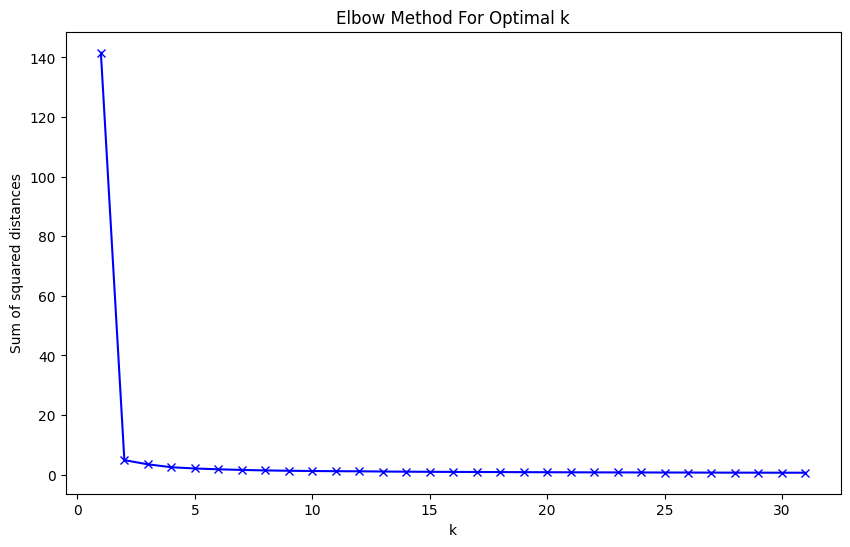

In [3]:
#A2. Determine the ideal k value for your dataset. Determine the clusters for a range of k ϵ [1,31]. Use
#elbow method to determine the ideal value of k based on average Euclidean distance from cluster center.
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming your data_without_labels array is ready as per your previous code

# Range of k values
k_values = range(1, 32)  # k ϵ [1,31]

# List to store the sum of squared distances for each k
sum_of_squared_distances = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data_without_labels)
    sum_of_squared_distances.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()


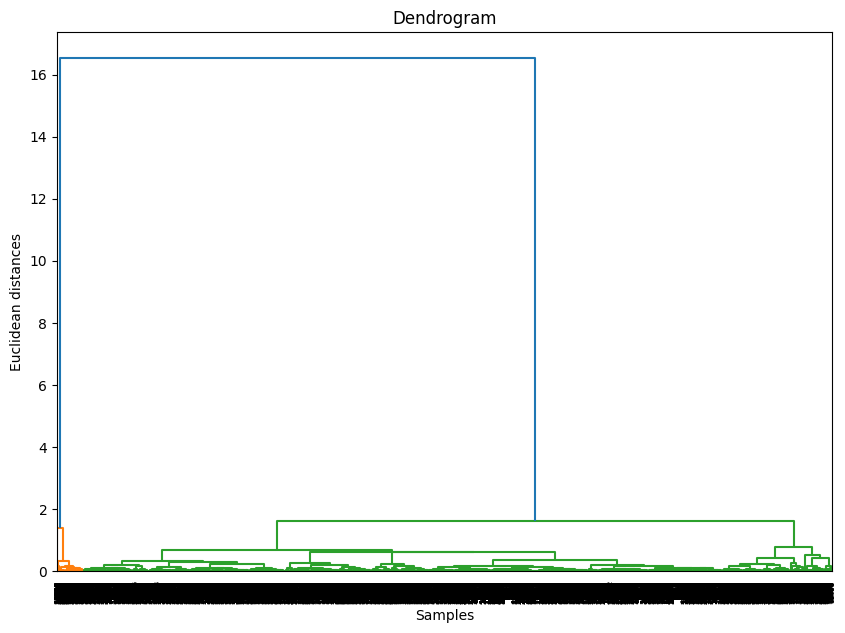

In [4]:
 # A3-Use Agglomerative Clustering for hierarchical clustering of your data. Plot the dendrogram to
#visualize the clusters.
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Assuming your data_without_labels array is ready as per your previous code

# Perform Agglomerative Clustering
clustering = AgglomerativeClustering().fit(data_without_labels)

# Plotting the Dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(data_without_labels, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()


In [7]:
#A4)Perform sequential feature selection algorithms for arriving at the optimal number of features needed for your dataset.

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.model_selection import train_test_split

# Load the datasets
features = np.load('/content/activation_maps_lines_image52_pixel (1).npy')
labels = np.load('/content/activation_maps_lines_image52_labelpixel.npy')

# Concatenate features and labels
merged_data = np.concatenate((features, labels), axis=1)

# Remove class labels (assuming they are in the last column)
data_without_labels = merged_data[:, :-1]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data_without_labels, labels, test_size=0.3, random_state=0)

# Initialize classifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# Sequential Forward Selection
sfs = SFS(clf,
          k_features='best',
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=5)

sfs = sfs.fit(X_train, y_train.ravel())

# To get the indices of selected features
selected_feature_indices = list(sfs.k_feature_idx_)
print("Selected feature indices:", selected_feature_indices)


Selected feature indices: [3]


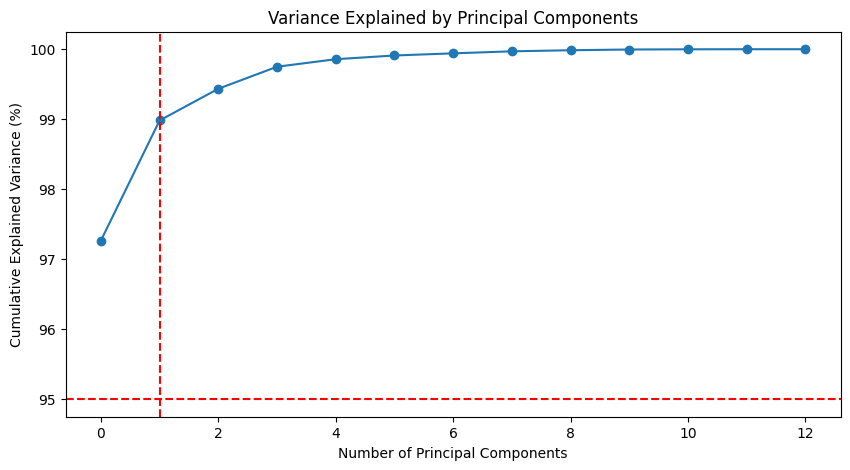

Number of features needed to capture 95% of data variance: 1


In [8]:
#A5)Perform PCA on your data set. Observe the variances along the principal components. Identify
#the features needed to capture 95% of data variance. Let’s say the number of features needed is K.
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming data_without_labels is your dataset

# PCA
pca = PCA().fit(data_without_labels)

# Cumulative sum of variance explained with [n] features
variance_cumsum = np.cumsum(pca.explained_variance_ratio_) * 100

# Number of features for 95% variance
k = np.argmax(variance_cumsum >= 95) + 1  # +1 as index starts from 0

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(variance_cumsum, marker='o')
plt.title('Variance Explained by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.axhline(y=95, color='r', linestyle='--')
plt.axvline(x=k, color='r', linestyle='--')
plt.show()

print(f"Number of features needed to capture 95% of data variance: {k}")


In [9]:
#A6). Transform your data with the initial K PC’s. Calculate the accuracy using the transformed dataset.

import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the datasets
features = np.load('/content/activation_maps_lines_image52_pixel (1).npy')
labels = np.load('/content/activation_maps_lines_image52_labelpixel.npy')

# Concatenate features and labels
merged_data = np.concatenate((features, labels), axis=1)

# Remove class labels (assuming they are in the last column)
data_without_labels = merged_data[:, :-1]

# Apply PCA to identify the number of features for 95% variance
pca = PCA().fit(data_without_labels)
variance_cumsum = np.cumsum(pca.explained_variance_ratio_) * 100
k = np.argmax(variance_cumsum >= 95) + 1  # +1 as index starts from 0

# Transform the data with the initial K principal components
pca_k = PCA(n_components=k)
X_pca = pca_k.fit_transform(data_without_labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, labels, test_size=0.3, random_state=42)

# Train a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train.ravel())

# Predict and calculate accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy with {k} principal components: {accuracy}")


Accuracy with 1 principal components: 0.5284784377542717
